Import

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
import warnings


from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler as ROS

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score 

Reading Data

In [7]:
df = pd.read_csv('../../data_sets/fetal_health.csv')
df.dtypes

print(df.describe())


       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057               

Scaling Data

In [8]:
ss = StandardScaler()

df['fetal_health'].replace({1:0,2:1,3:2}, inplace = True)

unseen_data = df.sample(n=210)
remaining_data = df.drop(unseen_data.index)
unseen_data.reset_index(inplace=True)
remaining_data.reset_index(inplace=True)

remaining_data.drop('index',axis=1, inplace=True)
unseen_data.drop('index',axis=1, inplace=True)

scaled_data = remaining_data.copy()
scaled_data.drop('fetal_health',axis=1,inplace=True)

scaled_data = ss.fit_transform(scaled_data)

scaled_data = pd.DataFrame(scaled_data , columns = df.drop('fetal_health',axis=1).columns)
scaled_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.345452,-0.812752,-0.203442,-1.477881,-0.639156,-0.060554,-0.267325,1.509391,-0.935202,1.806075,...,-0.158462,-1.066996,-2.096213,-0.695150,-0.448256,-1.065418,0.159160,-1.180026,1.879336,1.106277
1,-0.030875,-0.030616,-0.203442,1.244831,0.372650,-0.060554,-0.267325,-1.817154,0.876117,-0.537953,...,1.536120,-0.864209,1.902747,0.320024,0.950537,0.219868,0.030733,-0.001050,-0.196177,-0.531765
2,0.070247,-0.030616,-0.203442,1.244831,0.372650,-0.060554,-0.267325,-1.817154,1.215739,-0.537953,...,1.202339,-1.371177,0.347596,2.350371,-0.448256,-0.024948,-0.033481,-0.070401,-0.196177,1.106277
3,-0.131996,1.012232,-0.203442,1.244831,-0.639156,-0.060554,-0.267325,-1.817154,1.215739,-0.537953,...,1.202339,-1.371177,0.347596,1.673589,-0.448256,-0.024948,0.094946,-0.001050,-0.265361,1.106277
4,0.070247,-0.552040,-0.203442,1.925508,2.396264,-0.060554,3.205179,-1.233550,5.177999,-0.537953,...,2.049629,-1.472570,2.013829,0.320024,3.748124,-3.758399,-1.767245,-2.150948,5.234750,-0.531765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,0.676974,-0.812752,-0.203442,0.904492,-0.639156,-0.060554,-0.267325,1.859554,-1.274824,0.824854,...,-0.774673,1.467843,0.736383,-0.018368,-0.448256,0.954318,0.993935,0.969872,-0.576688,-0.531765
1912,0.676974,-0.552040,-0.203442,0.904492,-0.639156,-0.060554,-0.267325,1.801194,-1.048410,0.661317,...,-0.107111,0.318716,0.292055,0.658415,-0.448256,0.893114,0.865508,0.900521,-0.542096,1.106277
1913,0.676974,-0.552040,-0.203442,0.904492,-0.639156,-0.060554,-0.267325,1.859554,-1.048410,0.552293,...,-0.081435,0.318716,0.347596,0.320024,-0.448256,0.954318,0.865508,0.969872,-0.507504,1.106277
1914,0.676974,-0.552040,-0.203442,0.564153,-0.639156,-0.060554,-0.267325,1.801194,-1.048410,0.933879,...,-0.107111,0.318716,0.292055,0.658415,-0.448256,0.893114,0.801295,0.900521,-0.507504,1.106277


Training

/Users/jeffreysiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass C=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/jeffreysiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass C=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/jeffreysiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass C=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/jeffreysiu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pa

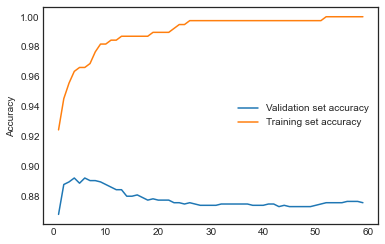

In [9]:
from sklearn.model_selection import train_test_split
target = remaining_data['fetal_health']
predictors = scaled_data.copy()

x_train, x_rest, y_train, y_rest = train_test_split(predictors,target, train_size=0.20,random_state= 42, stratify = target.values)
x_validate, x_test, y_validate, y_test = train_test_split(x_rest, y_rest, test_size=0.25, random_state=45)

sv = np.arange(1,60)
train_accuracy = np.empty(len(sv))
test_accuracy = np.empty(len(sv))

for i, k in enumerate(sv):
    svm = SVC(k)
    
    svm.fit(x_train, y_train)

    train_accuracy[i] = svm.score(x_train, y_train)
    test_accuracy[i] = svm.score(x_validate, y_validate)

plt.plot(sv, test_accuracy)
plt.plot(sv ,train_accuracy)

plt.legend(['Validation set accuracy','Training set accuracy'])
plt.ylabel('Accuracy')
plt.show()

warnings.filterwarnings('ignore')
warnings.warn('Delftstack')



In [10]:
#Split for validation --> train, val, test = 80/15/5

x_train, x_validation, y_train, y_validation = train_test_split(df.drop('fetal_health', axis=1), df['fetal_health'], test_size=0.20, random_state=33)

x_val, x_test, y_val, y_test = train_test_split(x_validation, y_validation, test_size=0.25, random_state=33)

print("x_train shape is:",x_train.shape)
print("y_train shape is:",y_train.shape, "\n")
print("x_val shape is:",x_val.shape)
print("y_val shape is:",y_val.shape, "\n")
print("x_test shape is:",x_test.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (1700, 21)
y_train shape is: (1700,) 

x_val shape is: (319, 21)
y_val shape is: (319,) 

x_test shape is: (107, 21)
y_test shape is: (107,)


SVM Model

Training accuracy: 0.8588235294117647
SVM scores
0.8878504672897196
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        83
         1.0       1.00      0.35      0.52        17
         2.0       0.86      0.86      0.86         7

    accuracy                           0.89       107
   macro avg       0.91      0.74      0.77       107
weighted avg       0.90      0.89      0.87       107

Confusion matrix:
[[83  0  0]
 [10  6  1]
 [ 1  0  6]]


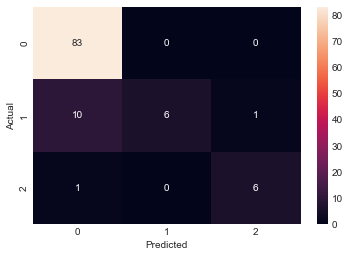

In [11]:
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])
models = {'SVM' : SVC(1)}
for test, clf in models.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    train_pred = clf.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    print('Training accuracy:',train_acc)
    print( test + ' scores')
    print(acc)
    print(classification_report(y_test,y_pred))
    print('Confusion matrix:')
    print(confusion_matrix(y_test,y_pred))
    confusion = sns.heatmap(confusion_matrix(y_test, y_pred),annot = True)
    confusion.set_xlabel("Predicted")
    confusion.set_ylabel("Actual")
    model_accuracy = model_accuracy.append({'Model': test, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index=True)